# Part 0


In [34]:
# 0. Import Libraries and Load Dataset

# Data analysis and statistics packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


# Load dataset from Drive (adjust filename if needed)
data_path = "/content/drive/MyDrive/EFIplus_medit.csv"
df = pd.read_csv(data_path, sep=';')
df.head()

# Standardize column names: lowercase, no spaces
df.columns = df.columns.str.strip().str.lower()

#  Preview cleaned column names
print("Columns loaded:", df.columns.tolist())

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columns loaded: ['site_code', 'latitude', 'longitude', 'country', 'catchment_name', 'galiza', 'subsample', 'calib_efi_medit', 'calib_connect', 'calib_hydrol', 'calib_morphol', 'calib_wqual', 'geomorph1', 'geomorph2', 'geomorph3', 'water_source_type', 'flow_regime', 'altitude', 'geological_typology', 'actual_river_slope', 'natural_sediment', 'elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul', 'barriers_catchment_down', 'barriers_river_segment_up', 'barriers_river_segment_down', 'barriers_number_river_segment_up', 'barriers_number_river_segment_down', 'barriers_distance_river_segment_up', 'barriers_distance_river_segment_down', 'impoundment', 'hydropeaking', 'water_abstraction', 'hydro_mod', 'temperature_impact', 'velocity_increase', 'reservoir_flushing', 'sedimentation', 'channelisation', 'cross_sec', 'instream_habitat', 'riparian_veg

,site_code,latitude,longitude,country,catchment_name,galiza,subsample,calib_efi_medit,calib_connect,calib_hydrol,...,squalius malacitanus,squalius pyrenaicus,squalius torgalensis,thymallus thymallus,tinca tinca,zingel asper,squalius sp,barbatula sp,phoxinus sp,iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


# Part 1

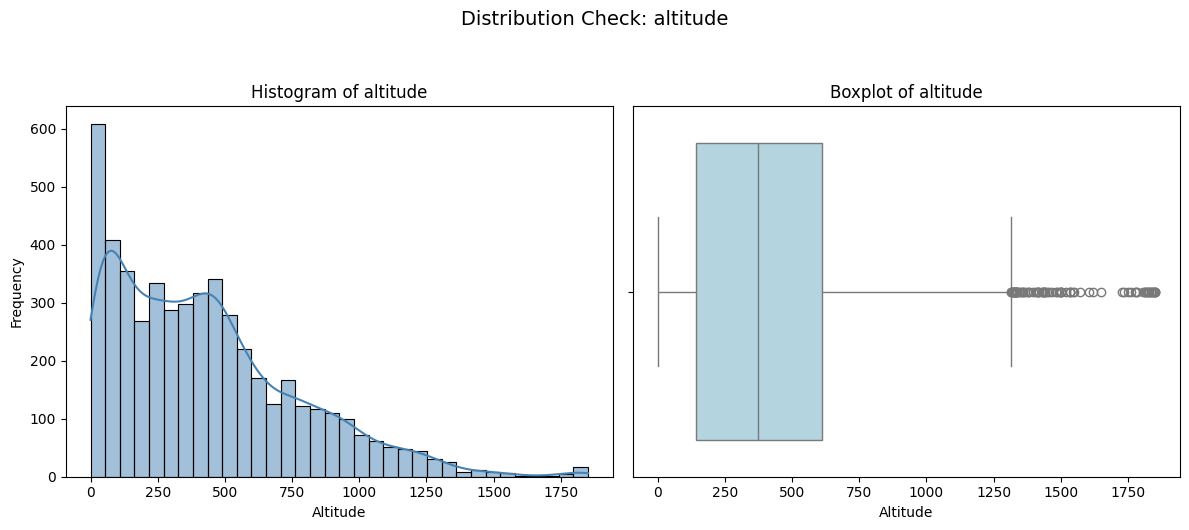

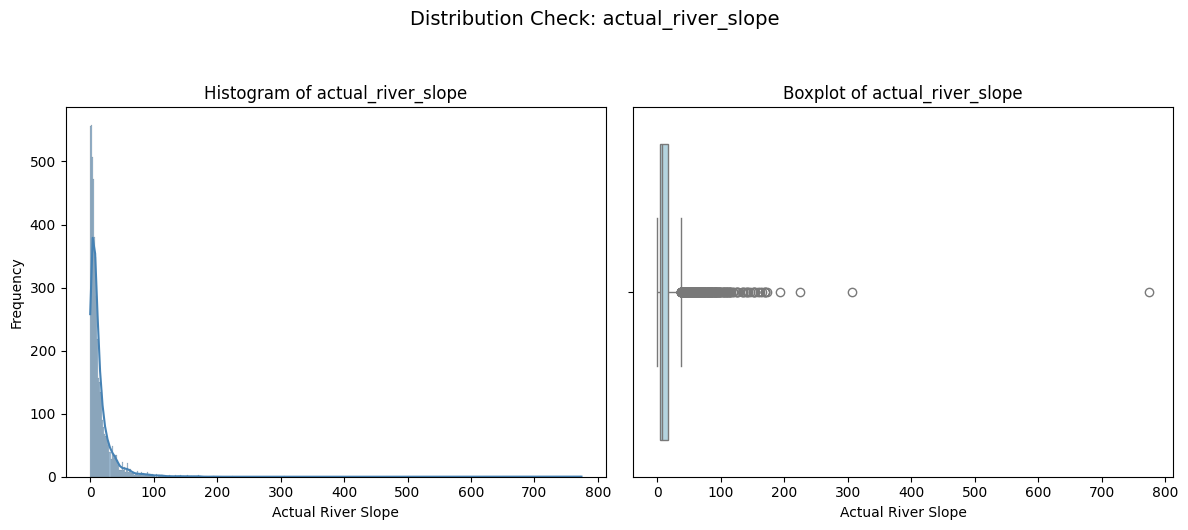

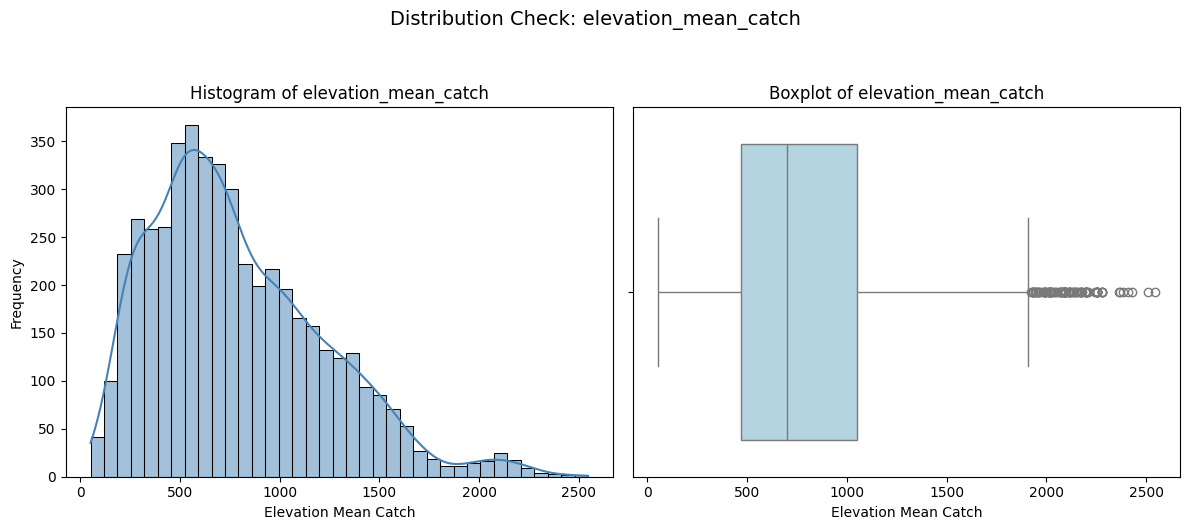

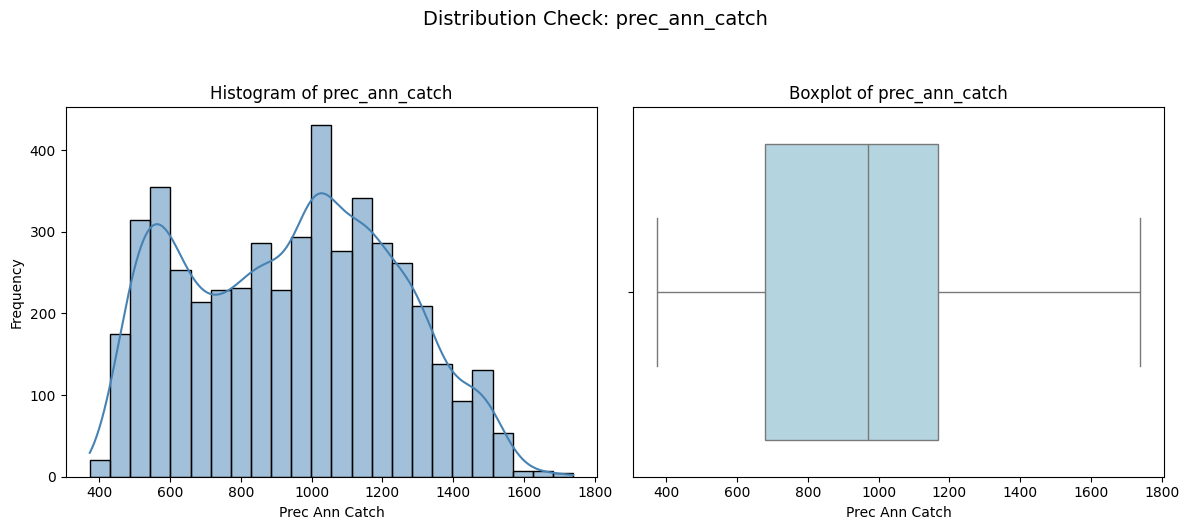

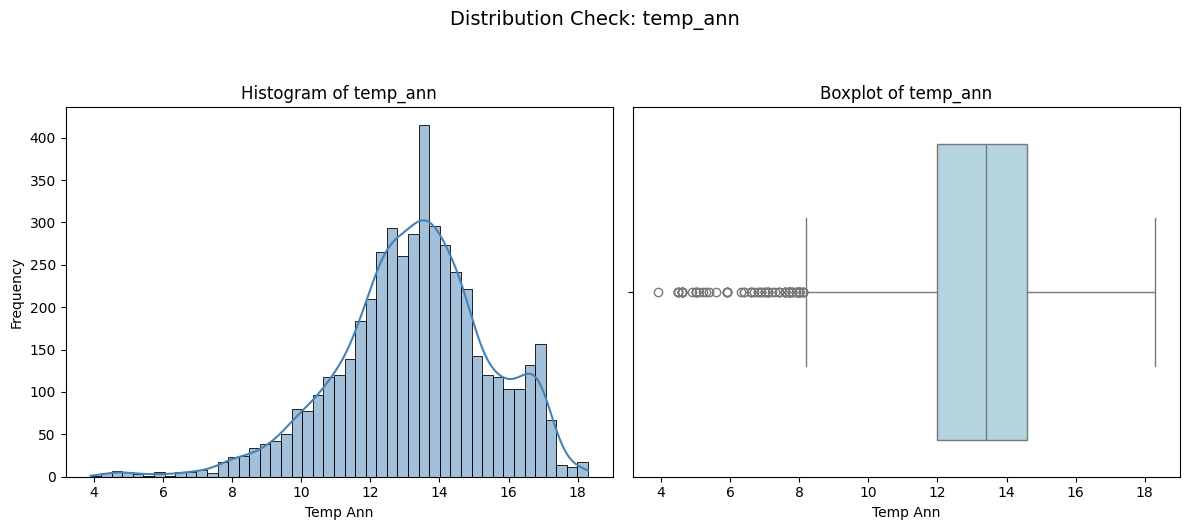

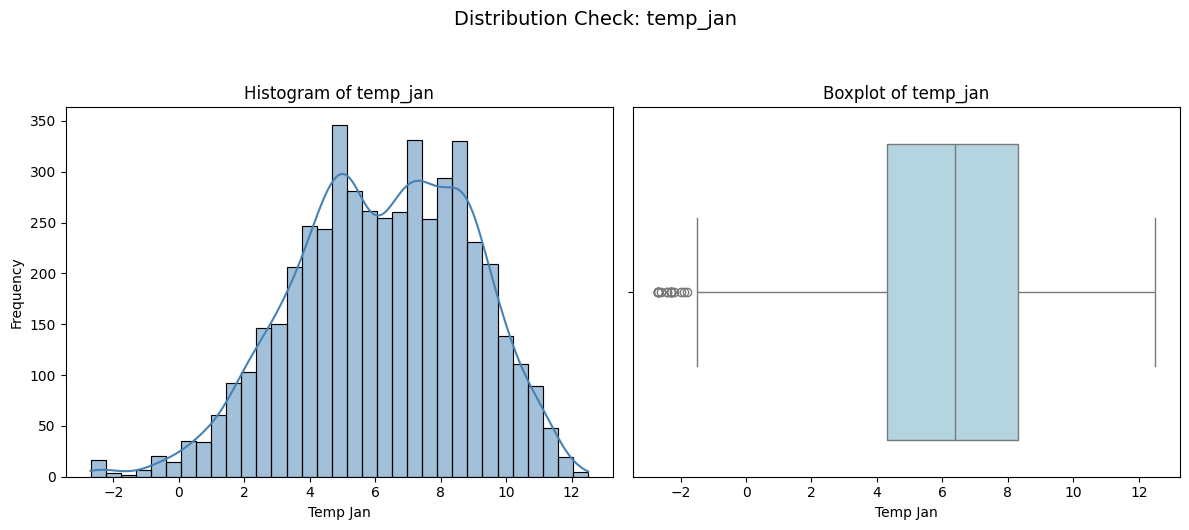

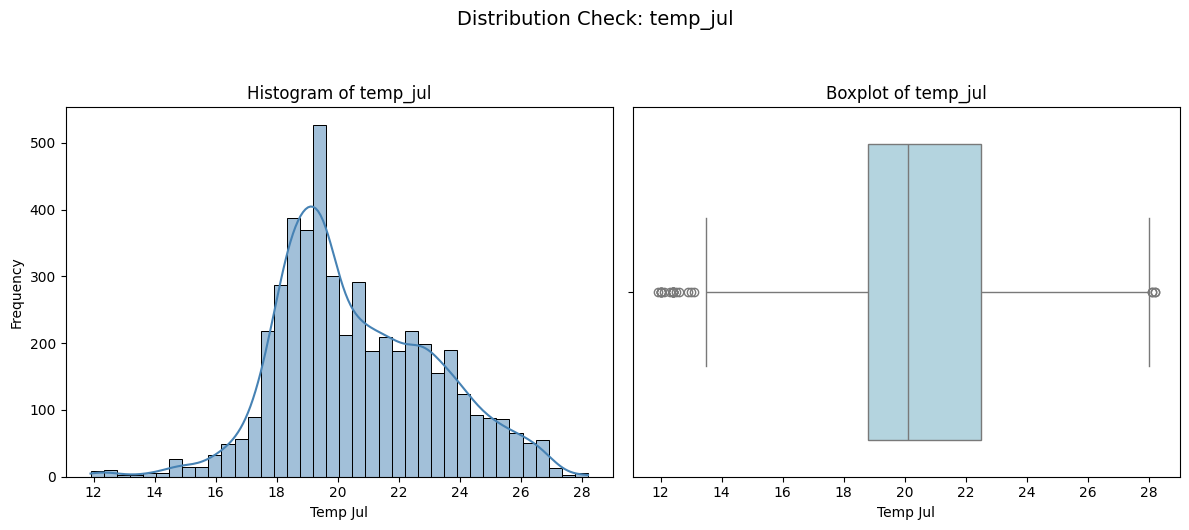

In [36]:
# 1. Visual Check of Continuous Variables

# List of continuous variables (matching lowercase column names)
continuous_vars = ['altitude', 'actual_river_slope', 'elevation_mean_catch',
                   'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

# Loop over each variable and plot histogram + boxplot
for var in continuous_vars:
    if var in df.columns:
        plt.figure(figsize=(12, 5))

        # Histogram with KDE
        plt.subplot(1, 2, 1)
        sns.histplot(df[var].dropna(), kde=True, color='steelblue')
        plt.title(f'Histogram of {var}', fontsize=12)
        plt.xlabel(var.replace('_', ' ').title())
        plt.ylabel('Frequency')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[var], color='lightblue')
        plt.title(f'Boxplot of {var}', fontsize=12)
        plt.xlabel(var.replace('_', ' ').title())

        plt.suptitle(f'Distribution Check: {var}', fontsize=14, y=1.05)
        plt.tight_layout()
        plt.show()
    else:
        print(f"⚠️ Variable '{var}' not found in the dataframe.")


# Part 2

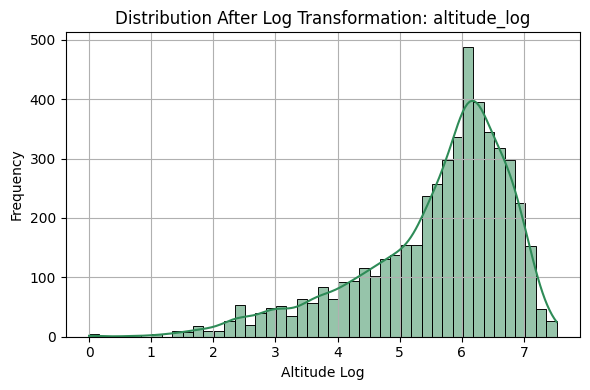

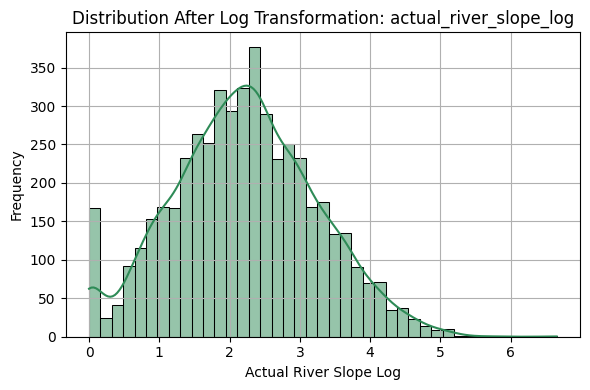

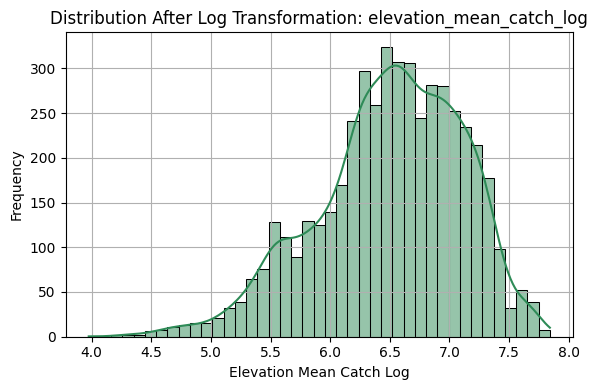

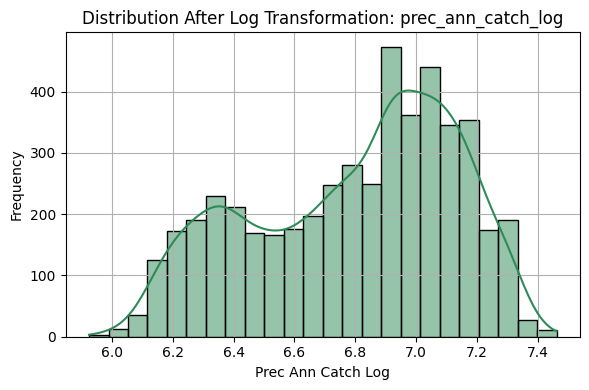

In [38]:
# 2. Apply Data Transformations

# Variables to be log-transformed (must be positive and typically right-skewed)
log_transform_vars = ['altitude', 'actual_river_slope', 'elevation_mean_catch', 'prec_ann_catch']

# Apply log1p transformation and create new columns
for var in log_transform_vars:
    if var in df.columns:
        new_var = f'{var}_log'
        df[new_var] = np.log1p(df[var])
    else:
        print(f"⚠️ Variable '{var}' not found in dataframe and was skipped.")

# Plot histograms of transformed variables
transformed_vars = [f"{var}_log" for var in log_transform_vars if f"{var}_log" in df.columns]

for var in transformed_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[var].dropna(), kde=True, color='seagreen')
    plt.title(f'Distribution After Log Transformation: {var}', fontsize=12)
    plt.xlabel(var.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Part 3

In [41]:
# 3. Calculate Species Richness

# Define the first species column (lowercase if columns were standardized)
first_species = 'abramis brama'

# Get all species columns from first_species to the end
if first_species in df.columns:
    start_index = df.columns.get_loc(first_species)
    species_columns = df.columns[start_index:]

    # Ensure all species columns are binary (presence/absence)
    df[species_columns] = (df[species_columns] >= 1).astype(int)

    # Calculate richness as the number of species present per row
    df['richness'] = df[species_columns].sum(axis=1)

    # De-fragment the DataFrame to avoid performance warnings
    df = df.copy()

    # Preview the result
    display_cols = ['richness'] + list(species_columns[:5])
    print("✅ Species richness calculated. Preview:")
    display(df[display_cols].head())

else:
    print(f"❗ Column '{first_species}' not found in the dataframe. Please check the column names.")

✅ Species richness calculated. Preview:


,richness,abramis brama,achondrostoma arcasii,achondrostoma occidentale,achondrostoma oligolepis,acipenser naccarii
0,5,0,0,0,0,0
1,6,0,0,0,0,0
2,6,0,0,0,0,0
3,7,0,0,0,0,0
4,7,0,0,0,0,0


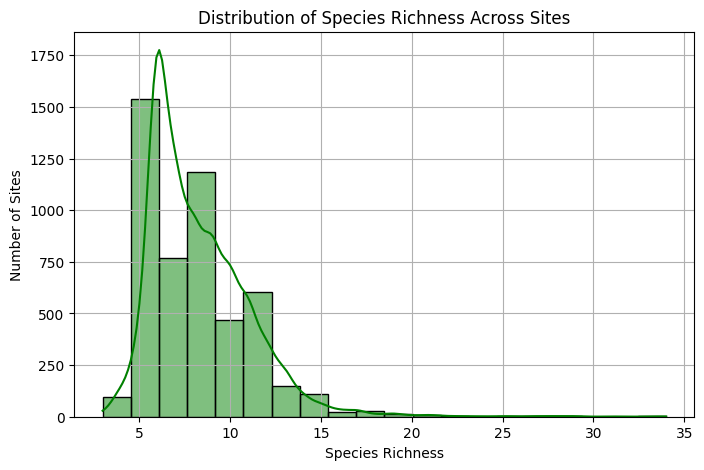

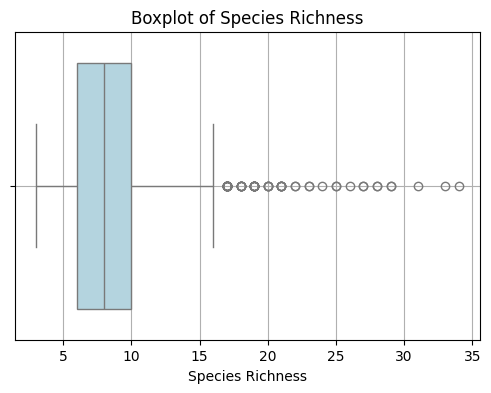

In [42]:
# --- HISTOGRAM ---
plt.figure(figsize=(8, 5))
sns.histplot(df['richness'], bins=20, kde=True, color='green')
plt.title('Distribution of Species Richness Across Sites')
plt.xlabel('Species Richness')
plt.ylabel('Number of Sites')
plt.grid(True)
plt.show()

# --- BOXPLOT ---
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['richness'], color='lightblue')
plt.title('Boxplot of Species Richness')
plt.xlabel('Species Richness')
plt.grid(True)
plt.show()

# Part 4

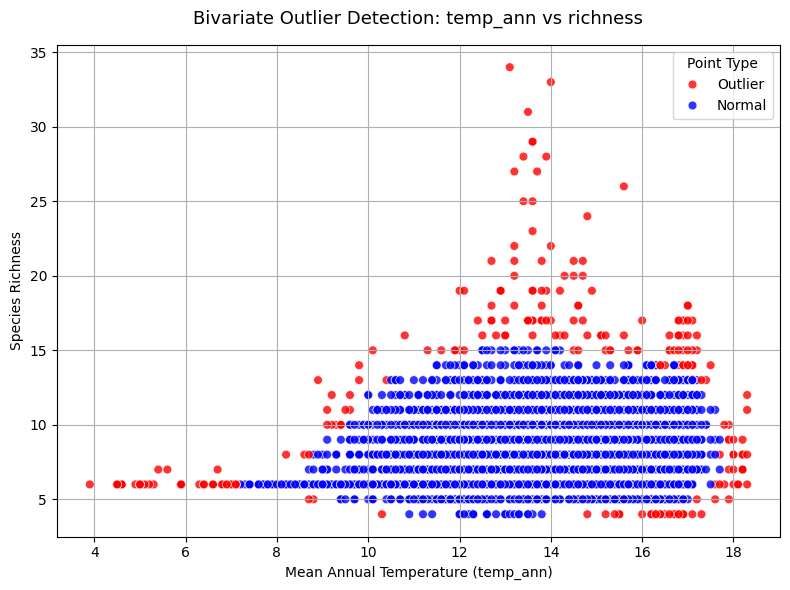

In [43]:
# 4. Detect Bivariate Outliers Using Isolation Forest

# Prepare data (avoid modifying original)
biv_data = df[['temp_ann', 'richness']].dropna().copy()

# Fit Isolation Forest for outlier detection
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(biv_data)
biv_data['outlier'] = model.predict(biv_data)  # -1 = outlier, 1 = inlier

# Map outlier codes to labels for clearer legend
biv_data['outlier_label'] = biv_data['outlier'].map({1: 'Normal', -1: 'Outlier'})

# Plot results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=biv_data, x='temp_ann', y='richness', hue='outlier_label',
                palette={'Normal': 'blue', 'Outlier': 'red'}, s=40, alpha=0.8)
plt.title('Bivariate Outlier Detection: temp_ann vs richness', fontsize=13, pad=15)
plt.xlabel('Mean Annual Temperature (temp_ann)')
plt.ylabel('Species Richness')
plt.legend(title='Point Type')
plt.grid(True)
plt.tight_layout()
plt.show()


# Part 5

Unique country values: ['Spain' 'France' 'Italy' 'Portugal']


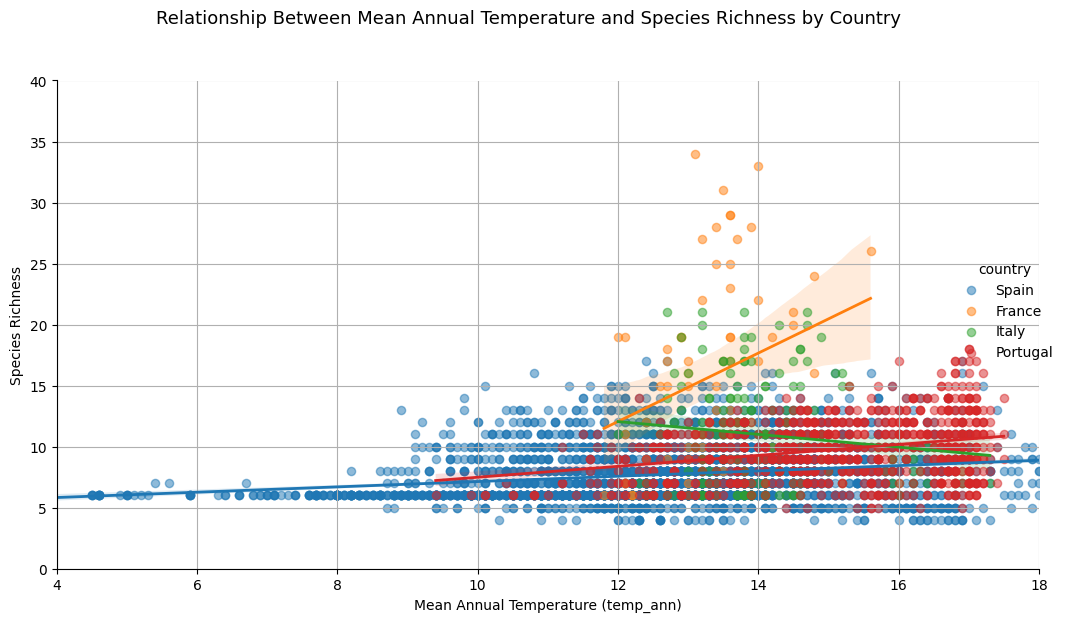

In [46]:
# 5. Visualize Relationship by Country (Improved + No Warnings)

if 'country' in df.columns:
    print("Unique country values:", df['country'].unique())

    # Improved lmplot with updated legend placement syntax
    plot = sns.lmplot(
        data=df,
        x='temp_ann',
        y='richness',
        hue='country',
        height=6,
        aspect=1.6,
        scatter_kws={'alpha': 0.5, 's': 35},
        line_kws={'linewidth': 2},
        facet_kws={'legend_out': True}  # ✅ updated per warning
    )

    # Axis labels and title
    plot.set_axis_labels("Mean Annual Temperature (temp_ann)", "Species Richness")
    plot.fig.suptitle('Relationship Between Mean Annual Temperature and Species Richness by Country',
                      fontsize=13, y=1.03)

    # Optional: fix axis limits for visual consistency
    plot.set(xlim=(4, 18), ylim=(0, 40))

    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("❗ Column 'country' not found in the current dataframe.")
